___
# Linear Regression Project


## Imports

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Get the Data

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [3]:
customers=pd.read_csv("Ecommerce Customers")

**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

In [11]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


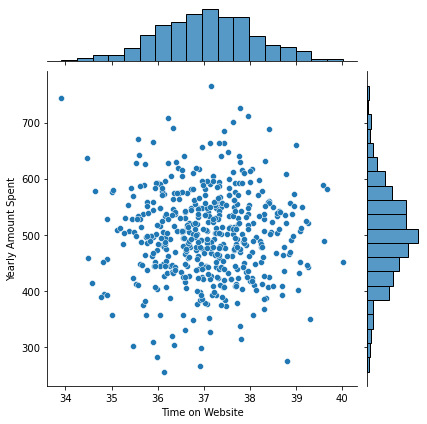

In [14]:
sns.jointplot('Time on Website','Yearly Amount Spent',data =customers) 

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


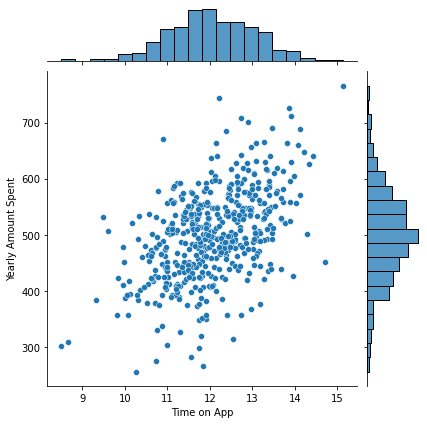

In [16]:
sns.jointplot('Time on App','Yearly Amount Spent',data =customers)

In [17]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

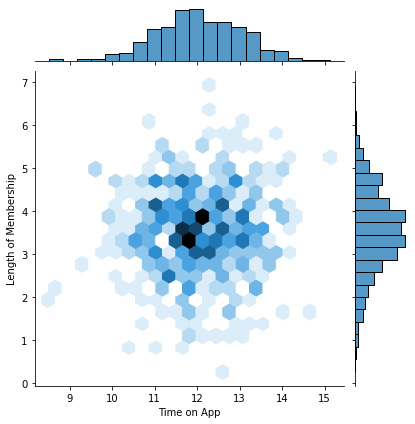

In [19]:
sns.jointplot('Time on App','Length of Membership',data =customers, kind='hex')

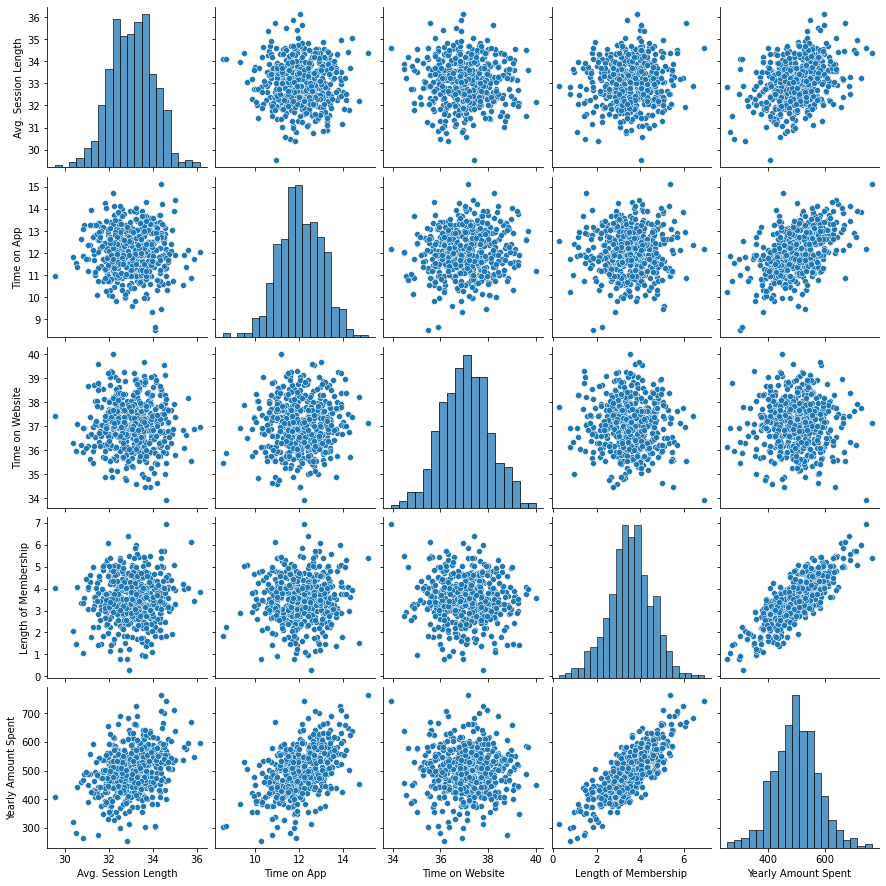

In [20]:
sns.pairplot(customers)

In [285]:
#the length of Membership is the most correlated feature with Yearly Amount Spent

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


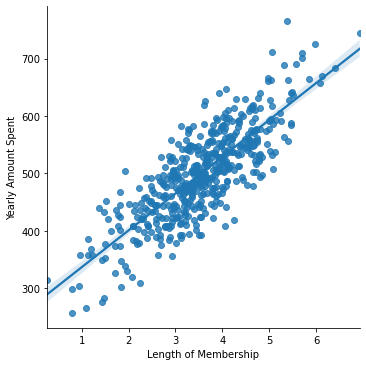

In [23]:
sns.lmplot('Length of Membership','Yearly Amount Spent', data =customers)

## Training and Testing Data

In [25]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [28]:
x=customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=customers['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [32]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [33]:
lm=LinearRegression()

** Train/fit lm on the training data.**

In [34]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [35]:
print('coefficients: \n',lm.coef_)

coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [41]:
predictions=lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

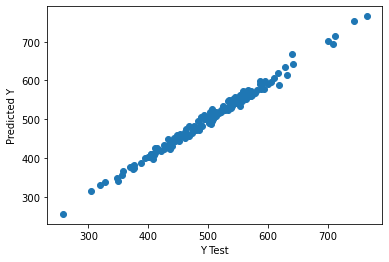

In [39]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


In [43]:
y.mean()

499.3140382585909

## Residuals

(array([0.00351159, 0.        , 0.        , 0.        , 0.01053476,
        0.00702317, 0.01404635, 0.01404635, 0.02458111, 0.03862746,
        0.03862746, 0.04213905, 0.05267381, 0.0280927 , 0.04565063,
        0.03511587, 0.03511587, 0.02458111, 0.03511587, 0.0280927 ,
        0.02458111, 0.00351159, 0.00702317, 0.00702317, 0.00351159,
        0.        , 0.        , 0.        , 0.        , 0.00351159]),
 array([-26.95573072, -25.05725396, -23.15877721, -21.26030045,
        -19.3618237 , -17.46334694, -15.56487019, -13.66639343,
        -11.76791668,  -9.86943992,  -7.97096317,  -6.07248642,
         -4.17400966,  -2.27553291,  -0.37705615,   1.5214206 ,
          3.41989736,   5.31837411,   7.21685087,   9.11532762,
         11.01380438,  12.91228113,  14.81075789,  16.70923464,
         18.6077114 ,  20.50618815,  22.4046649 ,  24.30314166,
         26.20161841,  28.10009517,  29.99857192]),
 <a list of 30 Patch objects>)

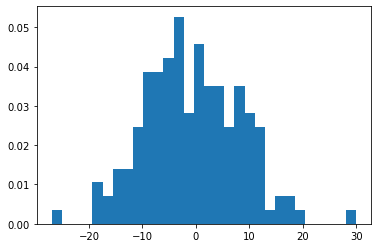

In [49]:
plt.hist((y_test-predictions),bins=30)

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


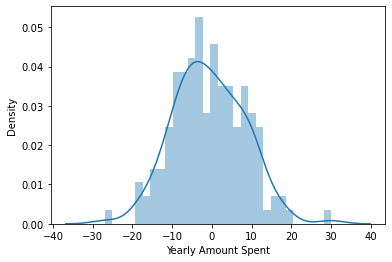

In [50]:
sns.distplot((y_test-predictions),bins=30)

In [ ]:
#Our residuals are normaly distributed => good model 

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.

** Recreate the dataframe below. **

In [47]:
df=pd.DataFrame(lm.coef_,x.columns)
df.columns=['coeffecient']
df

,coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Do you think the company should focus more on their mobile app or on their website?**

There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, we would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!